# CTCF DNA Sequence Model Optimization -- Joseph Kim

In [1]:
import numpy as np
import zipfile 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# initiate data tables
with zipfile.ZipFile("assignment_04.zip", 'r') as z:
    with z.open('ctcf_bound_sequence.txt') as file:
        bound_sequences = file.read().decode('utf-8').splitlines()
        bound_sequences_df = pd.DataFrame(bound_sequences)
    
    with z.open('ctcf_unbound_sequence.txt') as file:
        unbound_sequences = file.read().decode('utf-8').splitlines()
        unbound_sequences_df = pd.DataFrame(unbound_sequences)

In [3]:
bound_sequences_df

,0
0,CGGGCCCTTTTGTACGCGGATCTATCGACC
1,GTAGTTACCCCAGAGTAGTCGCCAAACGCC
2,TTCTCACTCCTGAAGGTTACTCGCTTCCTT
3,TGGACTAGACACGTGATGGTATGGACTCCC
4,CCGATTCTCCACCGTAAGGGAACATTTCCT
...,...
1995,AAAGAGCGCTAAGAACCCATATCTAGAAGA
1996,GCTTTATGCAACGACGAGGTGGTTAATGAT
1997,CCTCGGACCCGCCAGCTGCAGGGGAGAAGG
1998,GCACTCGATCTTTGGGGGTCCGCGGTGCTA


In [ ]:
def read_shape(tf_name, feature_type):
    # found on the internet; with the zipfile open, we can look at the files inside
    with zipfile.ZipFile('assignment_04.zip', 'r') as z: 
        
        # we have to consider the filename when creating numpy arrays
        shape_files = [f for f in z.namelist() if tf_name in f] 
        shape_files = [f for f in shape_files if feature_type in f]

        shape_array = []
        #temp = [] # creating a temp array to store values and append to shape array

        for shape_file in shape_files:
            with z.open(shape_file) as file: 
                for line in file: 
                    decoded_line = line.decode('utf-8') # translate the line from str to bytes with 'utf-8' decoding. Use strip() on line to remove whitespaces \t and \n

                    values = [float(x) for x in decoded_line.split(' ')] # formatting is slightly changed from last week; split by ' ' not ','
                    # reads values line by line and determines the values in a list, removes all NA values
                    shape_array.append(values)

        shape_array = np.array(shape_array)

    return shape_array

In [5]:
bound_data = []
unbound_data = []

In [6]:
bound_data.append(read_shape('f_b', 'HelT')) 
bound_data.append(read_shape('f_b', 'MGW'))
bound_data.append(read_shape('f_b', 'ProT'))
bound_data.append(read_shape('f_b', 'Roll'))

In [7]:
print(bound_data)

[array([[32.299187, 33.76005 , 33.494972, ..., 35.126404, 34.64012 ,
        33.768417],
       [33.414623, 34.59502 , 32.295177, ..., 33.423203, 36.39585 ,
        33.108578],
       [34.252808, 36.297737, 31.832935, ..., 34.825424, 32.92126 ,
        36.794247],
       ...,
       [34.002197, 31.422474, 34.910454, ..., 35.137634, 32.223198,
        34.30226 ],
       [35.055206, 33.865623, 34.289307, ..., 36.346428, 31.648008,
        33.51248 ],
       [33.251526, 36.136505, 32.380905, ..., 35.86503 , 33.63806 ,
        32.48345 ]]), array([[5.36639  , 5.267723 , 5.017685 , ..., 5.1328373, 4.646327 ,
        4.8895884],
       [5.176169 , 5.688383 , 5.324794 , ..., 4.84888  , 4.9288335,
        5.194605 ],
       [4.539667 , 4.737911 , 5.0603065, ..., 4.4835663, 4.789044 ,
        5.2929745],
       ...,
       [4.6587663, 4.8801203, 5.2579265, ..., 4.7172027, 4.480734 ,
        4.5517454],
       [5.465705 , 5.6387987, 5.468154 , ..., 5.347596 , 5.8866878,
        5.7325025],
     

In [8]:
unbound_data.append(read_shape('f_u', 'HelT')) 
unbound_data.append(read_shape('f_u', 'MGW'))
unbound_data.append(read_shape('f_u', 'ProT'))
unbound_data.append(read_shape('f_u', 'Roll'))

print(len(unbound_data))

4


Add Normalization

In [9]:
def minmax(arr): # simple minmax scaling to be used with datasets
    min_val = np.min(arr)
    denom = np.max(arr) - np.min(arr)
    scaled_arr = (arr - min_val) / denom
    return scaled_arr

In [10]:
unbound_copy = unbound_data.copy()
bound_copy = bound_data.copy()

for i in range(len(unbound_data)):
    unbound_data[i] = minmax(unbound_copy[i])
    bound_data[i] = minmax(bound_copy[i])

In [11]:
print(unbound_data)

[array([[0.66270113, 0.67544794, 0.54850205, ..., 0.77493333, 0.365125  ,
        0.54318814],
       [0.38946674, 0.68052989, 0.54737893, ..., 0.32384444, 0.61330336,
        0.27614672],
       [0.65872752, 0.29777444, 0.65028054, ..., 0.4419867 , 0.37876464,
        0.61622935],
       ...,
       [0.35527798, 0.4285266 , 0.71199008, ..., 0.35745049, 0.83620762,
        0.20483499],
       [0.3573158 , 0.39459411, 0.77817   , ..., 0.19528743, 0.79924143,
        0.34145458],
       [0.45496901, 0.22155696, 0.56157175, ..., 0.26067312, 0.41523106,
        0.44163538]]), array([[0.44198442, 0.58925526, 0.79080376, ..., 0.65740915, 0.69337511,
        0.75233114],
       [0.67879409, 0.61221611, 0.60262757, ..., 0.70061945, 0.70205799,
        0.70708321],
       [0.68408121, 0.61557903, 0.62255863, ..., 0.74920362, 0.70530597,
        0.69390047],
       ...,
       [0.66324391, 0.6186239 , 0.6342941 , ..., 0.66655885, 0.65101476,
        0.75176886],
       [0.66186257, 0.59721401, 0

One Hot Encoding

In [ ]:
def onehot(sequence): # quick onehot function for DNA
    temp = ''

    one_mer_dict = {
        'A': '1000',
        'C': '0100',
        'G': '0010',
        'T': '0001'
    }

    for char in sequence:
        temp += one_mer_dict[char]

    return temp

In [ ]:
def encode_tf(ctcf_df): # encoding with onehot then converting into an array of ints
    tf_1mer = ctcf_df.copy()
    
    for i in range(len(ctcf_df)):
        tf_1mer[0][i] = onehot(ctcf_df[0][i])

    encoded = np.array([list(map(int, seq)) for seq in tf_1mer[0]])  

    return encoded

In [14]:
encoded_bound = encode_tf(bound_sequences_df)
encoded_unbound = encode_tf(unbound_sequences_df)

print(len(encoded_bound), len(encoded_bound[0]))

C:\Users\josep\AppData\Local\Temp\ipykernel_33056\3534818494.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tf_1mer[0][i] = onehot(ctcf_df[0][i])


2000 120


Concatenation

In [15]:
bound_1mer = np.concatenate((encoded_bound, bound_data[0], bound_data[1], bound_data[2], bound_data[3]), axis=1)
unbound_1mer = np.concatenate((encoded_unbound, unbound_data[0], unbound_data[1], unbound_data[2], unbound_data[3]), axis=1)

bound_1mer

array([[0.        , 1.        , 0.        , ..., 0.44359429, 0.38096843,
        0.4491488 ],
       [0.        , 0.        , 1.        , ..., 0.73553771, 0.39748693,
        0.42258333],
       [0.        , 0.        , 0.        , ..., 0.413452  , 0.40077062,
        0.51145265],
       ...,
       [0.        , 1.        , 0.        , ..., 0.3300355 , 0.35995383,
        0.41567345],
       [0.        , 0.        , 1.        , ..., 0.44646694, 0.42539044,
        0.84080926],
       [0.        , 0.        , 1.        , ..., 0.44480522, 0.50531655,
        0.77215727]])

### kNN Classification with Noise

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

model = KNeighborsClassifier()

In [17]:
# Prepare X and y; y = 1 if bound and y = 0 if unbound, so I assume that we are creating
X = np.vstack((bound_1mer, unbound_1mer)) # stack the bound_1mer and unbound_1mer arrays

y_bound = np.ones(len(bound_1mer))   
y_unbound = np.zeros(len(unbound_1mer))  
y = np.concatenate((y_bound, y_unbound))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
param_grid = {'n_neighbors': np.arange(1, 21)} 

grid_search_clean = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search_clean.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

Add Gaussian noise for noisy comparison

In [20]:
noisy_data_train = X_train + np.random.normal(0, 0.1, X_train.shape)
noisy_data_test = X_test + np.random.normal(0, 0.1, X_test.shape)

In [21]:
grid_search_noisy = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search_noisy.fit(noisy_data_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

In [22]:
best_clean = grid_search_clean.best_estimator_
best_noisy = grid_search_noisy.best_estimator_

print(best_clean, best_noisy)

KNeighborsClassifier(n_neighbors=3) KNeighborsClassifier(n_neighbors=3)


In [23]:
y_pred_clean = best_clean.predict(X_test)
y_pred_noisy = best_noisy.predict(noisy_data_test)

Generate metrics

In [24]:
performance_clean = {
    'AUROC': roc_auc_score(y_test, y_pred_clean),
    'Accuracy': accuracy_score(y_test, y_pred_clean),
    'Precision': precision_score(y_test, y_pred_clean),
    'Recall': recall_score(y_test, y_pred_clean),
    'F1-Score': f1_score(y_test, y_pred_clean)
}

performance_noisy = {
    'AUROC': roc_auc_score(y_test, y_pred_noisy),
    'Accuracy': accuracy_score(y_test, y_pred_noisy),
    'Precision': precision_score(y_test, y_pred_noisy),
    'Recall': recall_score(y_test, y_pred_noisy),
    'F1-Score': f1_score(y_test, y_pred_noisy)
}

print(performance_clean)
print(performance_noisy)

{'AUROC': 0.6885516186464054, 'Accuracy': 0.67375, 'Precision': 0.917098445595855, 'Recall': 0.4194312796208531, 'F1-Score': 0.5756097560975609}
{'AUROC': 0.6735625266430953, 'Accuracy': 0.6575, 'Precision': 0.9252873563218391, 'Recall': 0.3815165876777251, 'F1-Score': 0.540268456375839}


In [25]:
results_clean = grid_search_clean.cv_results_
results_noisy = grid_search_noisy.cv_results_

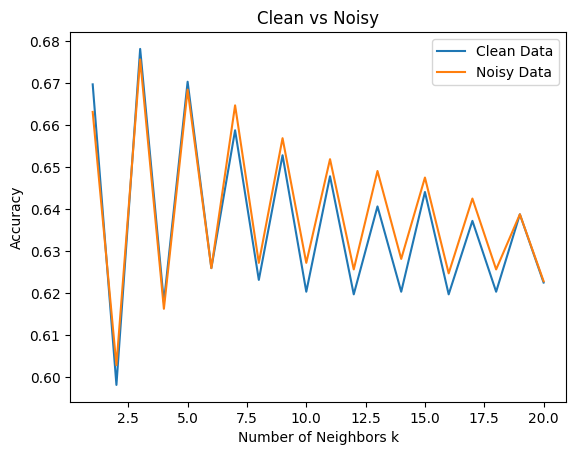

In [26]:
plt.plot(param_grid['n_neighbors'], results_clean['mean_test_score'], label='Clean Data')
plt.plot(param_grid['n_neighbors'], results_noisy['mean_test_score'], label='Noisy Data')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.title('Clean vs Noisy')
plt.legend()
plt.show()

### Decision Tree Classification with Undersampling

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample

Remove 50% randomly through resample

In [28]:
X_train_unbound = X_train[y_train == 0]
y_train_unbound = y_train[y_train == 0]
X_train_bound = X_train[y_train == 1]
y_train_bound = y_train[y_train == 1]

X_train_resampled, y_train_resampled = resample(X_train_unbound, y_train_unbound, replace=False, n_samples=len(X_train_unbound) // 2, random_state=42)

In [29]:
X_train_imbalanced = np.vstack((X_train_resampled, X_train_bound))
y_train_imbalanced = np.hstack((y_train_resampled, y_train_bound))

Decision Tree Classifer on resampled data

In [30]:
imbalanced_model = DecisionTreeClassifier(random_state=42)
imbalanced_model.fit(X_train_imbalanced, y_train_imbalanced)

DecisionTreeClassifier(random_state=42)

In [31]:
balanced_model = DecisionTreeClassifier(random_state=42)
balanced_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred_imbalanced = imbalanced_model.predict(X_test)
y_pred_balanced = balanced_model.predict(X_test)

Compare performance metrics

In [33]:
performance_balanced = {
    'AUROC': roc_auc_score(y_test, y_pred_balanced),
    'Accuracy': accuracy_score(y_test, y_pred_balanced),
    'Precision': precision_score(y_test, y_pred_balanced),
    'Recall': recall_score(y_test, y_pred_balanced),
    'F1-Score': f1_score(y_test, y_pred_balanced),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_balanced)
}

performance_imbalanced = {
    'AUROC': roc_auc_score(y_test, y_pred_imbalanced),
    'Accuracy': accuracy_score(y_test, y_pred_imbalanced),
    'Precision': precision_score(y_test, y_pred_imbalanced),
    'Recall': recall_score(y_test, y_pred_imbalanced),
    'F1-Score': f1_score(y_test, y_pred_imbalanced),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_imbalanced)
}

print(performance_balanced)
print(performance_imbalanced)

{'AUROC': 0.7454675393064019, 'Accuracy': 0.745, 'Precision': 0.7698019801980198, 'Recall': 0.7369668246445498, 'F1-Score': 0.7530266343825666, 'Confusion Matrix': array([[285,  93],
       [111, 311]], dtype=int64)}
{'AUROC': 0.7173825823114923, 'Accuracy': 0.7225, 'Precision': 0.7066115702479339, 'Recall': 0.8104265402843602, 'F1-Score': 0.7549668874172185, 'Confusion Matrix': array([[236, 142],
       [ 80, 342]], dtype=int64)}


Plot k vs performance

In [34]:
grid_search_balanced = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search_balanced.fit(X_train, y_train)

grid_search_imbalanced = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

In [35]:
results_balanced = grid_search_balanced.cv_results_
results_imbalanced = grid_search_imbalanced.cv_results_

In [36]:
mean_test_score_balanced = results_balanced['mean_test_score']
mean_test_score_imbalanced = results_imbalanced['mean_test_score']

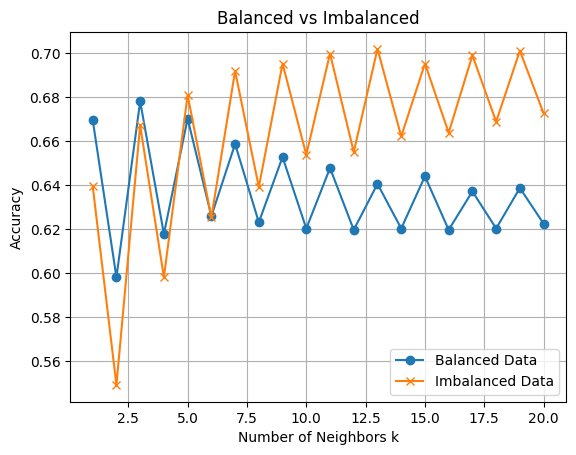

In [37]:
plt.plot(param_grid['n_neighbors'], mean_test_score_balanced, label='Balanced Data', marker='o')
plt.plot(param_grid['n_neighbors'], mean_test_score_imbalanced, label='Imbalanced Data', marker='x')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.title('Balanced vs Imbalanced')
plt.legend()
plt.grid(True)
plt.show()

The imbalanced dataset shows relatively higher accuracy for most values of k compared to the balanced dataset. The presence of more examples of the minority class (y=1, the bound sequences) in the balanced data likely challenges the kNN model more, as it has to accurately predict a smaller class compared to the majority. We can counteract this by oversampling the minority class, which can generate synthetic samples for the minority class without losing important data.

### Model Optimization with GridSearchCV

In [38]:
param_grid = {'max_depth': np.arange(1, 11)}  

dt = DecisionTreeClassifier(random_state=42)

In [39]:
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [40]:
best_dt = grid_search_dt.best_estimator_
y_pred = best_dt.predict(X_test)

Evaluate performance metrics

In [ ]:
performance = {
    'AUROC': roc_auc_score(y_test, y_pred),
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
}

print(performance) # precision at 0.812

{'AUROC': 0.7904661601344065, 'Accuracy': 0.79, 'Precision': 0.812807881773399, 'Recall': 0.7819905213270142, 'F1-Score': 0.7971014492753623}


Plot performance vs max depth

In [42]:
results = grid_search_dt.cv_results_
mean_test_scores = results['mean_test_score']

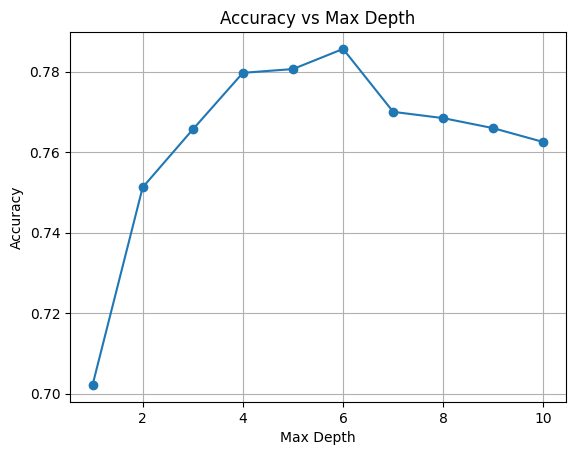

In [43]:
plt.plot(param_grid['max_depth'], mean_test_scores, label='Accuracy', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.grid(True)
plt.show()

Accuracy peaks when max depth reaches 6, after it steadily increases and before it decreases. Overfitting occurs when a model becomes too complex when training and captures the noise in the training data. With deeper trees, each leaf node might contain very few samples, which makes predictions sensitive to the specific data points in the training set. 

To avoid overfitting, we can prune the tree by setting constraints on max_depth. This helps to stop the tree from growing too deep and creating overly specific rules.